In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Raisin_Dataset.csv")

In [3]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [4]:
df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

In [5]:
#checking for null/missing values
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [6]:
df["Class"].value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
df_temp=df.drop(columns=['Class'])

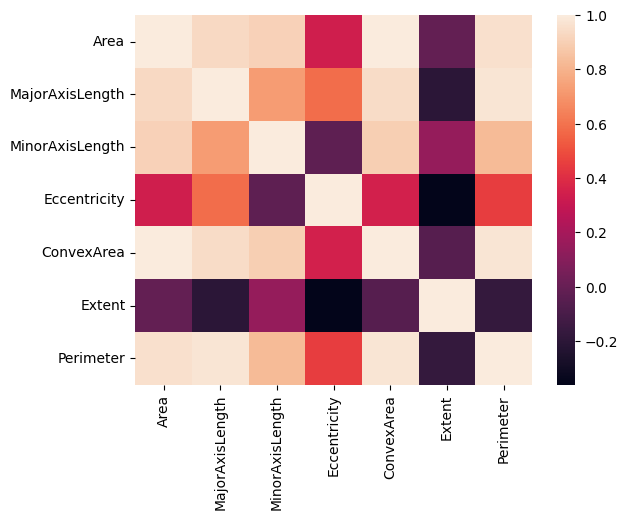

In [8]:
corr_plot=sns.heatmap(df_temp.corr())

In [9]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['encoded_labels']=label_encoder.fit_transform(df["Class"])

In [11]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['Class', 'encoded_labels'])
y=df['encoded_labels']

In [12]:
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve

DecisionTreeClassifier()
0.7666666666666667


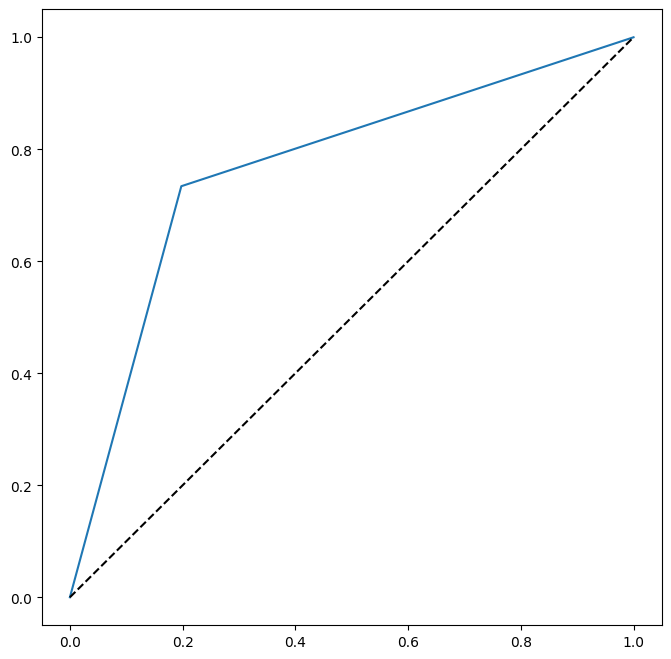

RandomForestClassifier()
0.8555555555555555


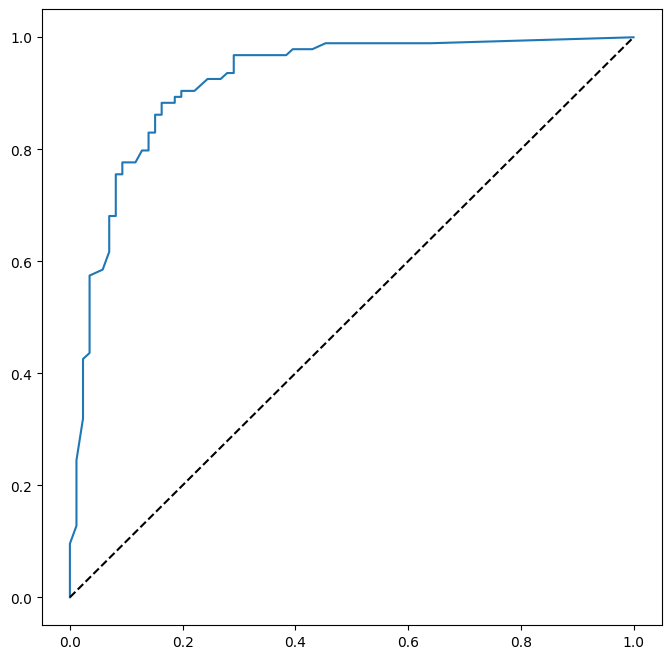

GaussianNB()
0.8277777777777777


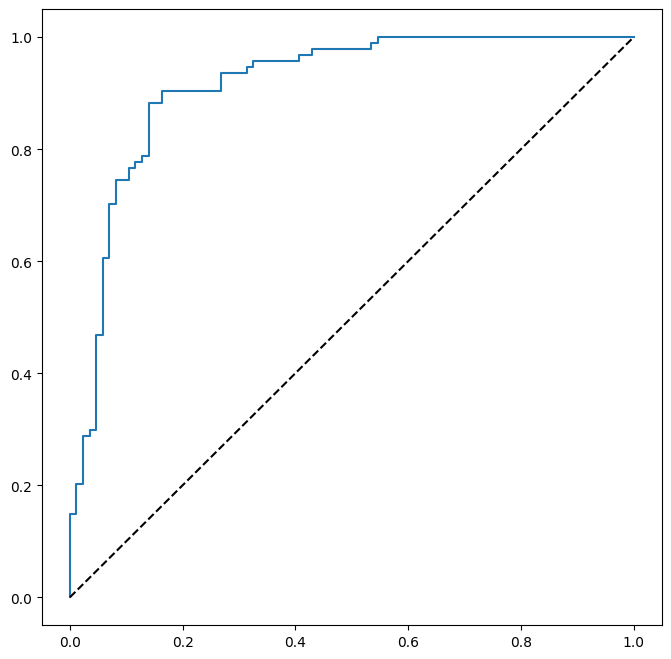

SVC(probability=True)
0.85


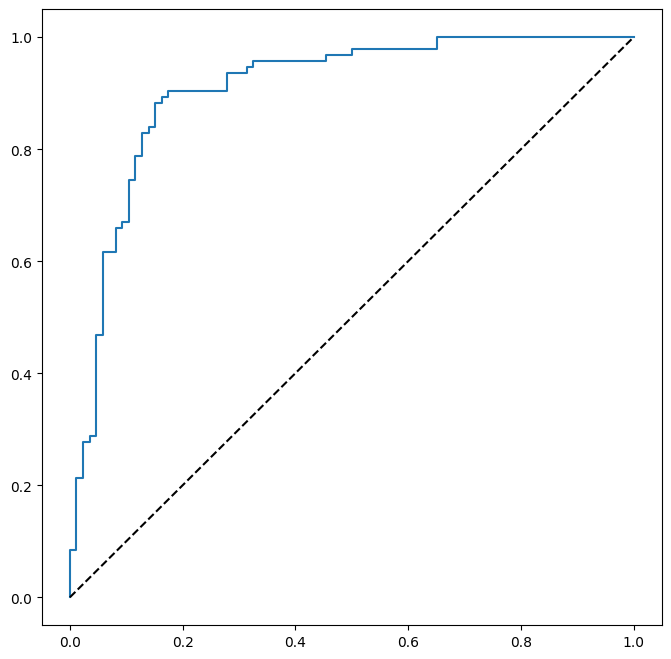

MultinomialNB()
0.8333333333333334


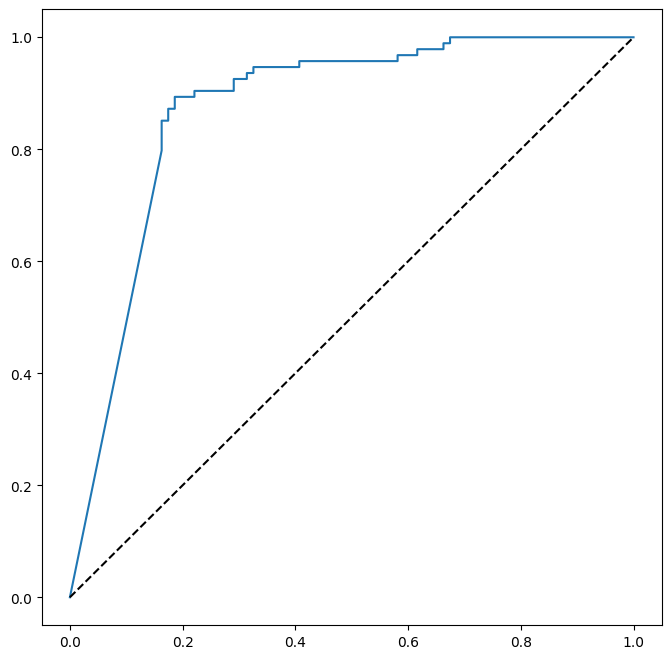

In [22]:
classifiers={
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True),
    "MNB":MultinomialNB()
}


for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    
    y_pred=clf.predict(X_test)
    

    accuracy=accuracy_score(y_test, y_pred)
    print(classifiers[name])
    print(accuracy)

    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
    plt.figure(figsize=(8,8))
    plt.plot(fpr,tpr)
    plt.plot([0,1], [0,1], 'k--')
    plt.show()

    y_pred_original = label_encoder.inverse_transform(y_pred)
   